In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data preprocessing

#### Importing Data dan Inspection

In [2]:
df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv',sep=';')

print('Lima data teratas:')
print(df.head())

print('\nInfo dataset:')
print(df.info())

Lima data teratas:
   no  Row_Num  Customer_ID Product  First_Transaction  Last_Transaction  \
0   1        1        29531   Jaket      1466304274396     1538718482608   
1   2        2        29531  Sepatu      1406077331494     1545735761270   
2   3        3       141526     Tas      1493349147000     1548322802000   
3   4        4       141526   Jaket      1493362372547     1547643603911   
4   5        5        37545  Sepatu      1429178498531     1542891221530   

   Average_Transaction_Amount  Count_Transaction  
0                     1467681                 22  
1                     1269337                 41  
2                      310915                 30  
3                      722632                 27  
4                     1775036                 25  

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      ----

#### Data Cleansing

In [3]:
df['First_Transaction'] = pd.to_datetime(df['First_Transaction'] /1000, unit='s', origin='1970-01-01')
# Kolom Last_Transaction
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction'] /1000, unit='s', origin='1970-01-01')

print('Lima data teratas:')
print(df.head())

print('\nInfo dataset:')
print(df.info())

Lima data teratas:
   no  Row_Num  Customer_ID Product             First_Transaction  \
0   1        1        29531   Jaket 2016-06-19 02:44:34.395999908   
1   2        2        29531  Sepatu 2014-07-23 01:02:11.493999958   
2   3        3       141526     Tas 2017-04-28 03:12:27.000000000   
3   4        4       141526   Jaket 2017-04-28 06:52:52.546999931   
4   5        5        37545  Sepatu 2015-04-16 10:01:38.530999899   

               Last_Transaction  Average_Transaction_Amount  Count_Transaction  
0 2018-10-05 05:48:02.608000040                     1467681                 22  
1 2018-12-25 11:02:41.269999981                     1269337                 41  
2 2019-01-24 09:40:02.000000000                      310915                 30  
3 2019-01-16 13:00:03.911000013                      722632                 27  
4 2018-11-22 12:53:41.529999970                     1775036                 25  

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries,

#### Churn Customers

In [4]:
# Pengecekan transaksaksi terakhir dalam dataset
print(max(df['Last_Transaction']))

# Klasifikasikan customer yang berstatus churn atau tidak dengan boolean
df.loc[df['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True
df.loc[df['Last_Transaction'] > '2018-08-01', 'is_churn'] = False

print('Lima data teratas:')
print(df.head())

print('\nInfo dataset:')
print(df.info())

2019-02-01 23:57:57.286000013
Lima data teratas:
   no  Row_Num  Customer_ID Product             First_Transaction  \
0   1        1        29531   Jaket 2016-06-19 02:44:34.395999908   
1   2        2        29531  Sepatu 2014-07-23 01:02:11.493999958   
2   3        3       141526     Tas 2017-04-28 03:12:27.000000000   
3   4        4       141526   Jaket 2017-04-28 06:52:52.546999931   
4   5        5        37545  Sepatu 2015-04-16 10:01:38.530999899   

               Last_Transaction  Average_Transaction_Amount  \
0 2018-10-05 05:48:02.608000040                     1467681   
1 2018-12-25 11:02:41.269999981                     1269337   
2 2019-01-24 09:40:02.000000000                      310915   
3 2019-01-16 13:00:03.911000013                      722632   
4 2018-11-22 12:53:41.529999970                     1775036   

   Count_Transaction is_churn  
0                 22    False  
1                 41    False  
2                 30    False  
3                 27    False

In [5]:
df.dtypes

,0
no,int64
Row_Num,int64
Customer_ID,int64
Product,object
First_Transaction,datetime64[ns]
Last_Transaction,datetime64[ns]
Average_Transaction_Amount,int64
Count_Transaction,int64
is_churn,object


#### Menghapus kolom yang tidak diperlukan

In [6]:
# Hapus kolom-kolom yang tidak diperlukan
del df['no']
del df['Row_Num']

# Cetak lima data teratas
print(df.head())

   Customer_ID Product             First_Transaction  \
0        29531   Jaket 2016-06-19 02:44:34.395999908   
1        29531  Sepatu 2014-07-23 01:02:11.493999958   
2       141526     Tas 2017-04-28 03:12:27.000000000   
3       141526   Jaket 2017-04-28 06:52:52.546999931   
4        37545  Sepatu 2015-04-16 10:01:38.530999899   

               Last_Transaction  Average_Transaction_Amount  \
0 2018-10-05 05:48:02.608000040                     1467681   
1 2018-12-25 11:02:41.269999981                     1269337   
2 2019-01-24 09:40:02.000000000                      310915   
3 2019-01-16 13:00:03.911000013                      722632   
4 2018-11-22 12:53:41.529999970                     1775036   

   Count_Transaction is_churn  
0                 22    False  
1                 41    False  
2                 30    False  
3                 27    False  
4                 25    False  


In [7]:
df['is_churn'].value_counts()

,count
is_churn,
True,66569
False,33431


In [8]:
df

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn
0,29531,Jaket,2016-06-19 02:44:34.395999908,2018-10-05 05:48:02.608000040,1467681,22,False
1,29531,Sepatu,2014-07-23 01:02:11.493999958,2018-12-25 11:02:41.269999981,1269337,41,False
2,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,False
3,141526,Jaket,2017-04-28 06:52:52.546999931,2019-01-16 13:00:03.911000013,722632,27,False
4,37545,Sepatu,2015-04-16 10:01:38.530999899,2018-11-22 12:53:41.529999970,1775036,25,False
...,...,...,...,...,...,...,...
99995,56249,Jaket,2016-06-01 11:35:39.092000008,2016-06-01 11:35:39.092000008,298662,1,True
99996,56249,Sepatu,2017-02-09 05:46:10.763000011,2017-02-09 05:46:10.763000011,349556,1,True
99997,34157,Jaket,2015-08-30 08:54:20.706000090,2015-08-30 08:54:20.706000090,598013,1,True
99998,34157,Sepatu,2014-11-14 02:42:28.026000023,2014-11-14 02:42:28.026000023,1208591,1,True


### Visualisasi

#### Customer acquisition by year

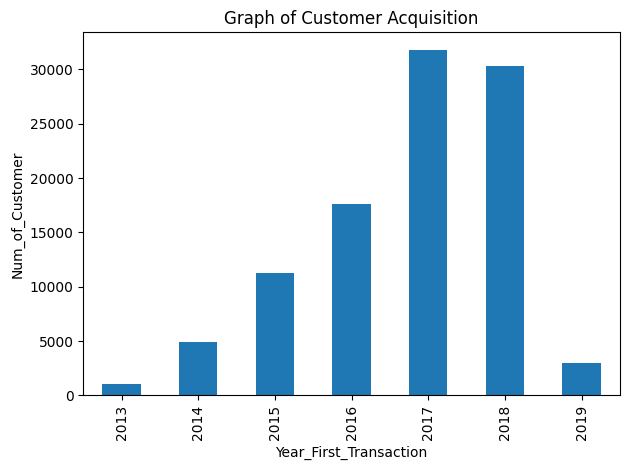

In [9]:
# Kolom tahun transaksi pertama
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
# Kolom tahun transaksi terakhir
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year

df_year = df.groupby(['Year_First_Transaction'])['Customer_ID'].count()
df_year.plot(x='Year_First_Transaction', y='Customer_ID', kind='bar', title='Graph of Customer Acquisition')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

#### Transaction by year

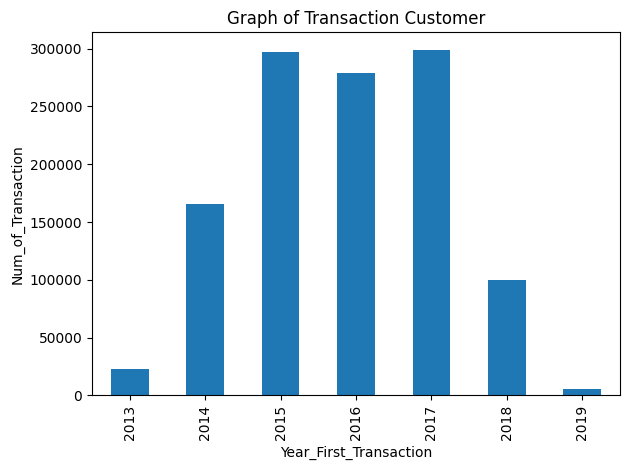

In [10]:
plt.clf()
df_year = df.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
df_year.plot(x='Year_First_Transaction', y='Count_Transaction', kind='bar', title='Graph of Transaction Customer')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Transaction')
plt.tight_layout()
plt.show()

#### Average transaction amount by year

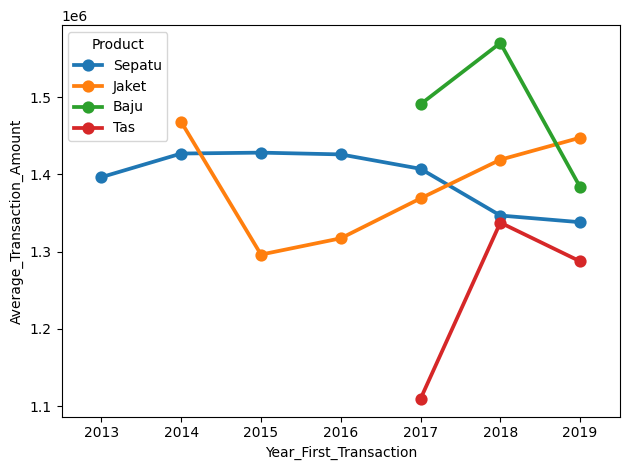

In [11]:
plt.clf()
sns.pointplot(data = df.groupby(['Product', 'Year_First_Transaction']).mean().reset_index(),
              x='Year_First_Transaction',
              y='Average_Transaction_Amount',
              hue='Product')
plt.tight_layout()
plt.show()

#### Proporsi churned customer untuk setiap produk

<Figure size 640x480 with 0 Axes>

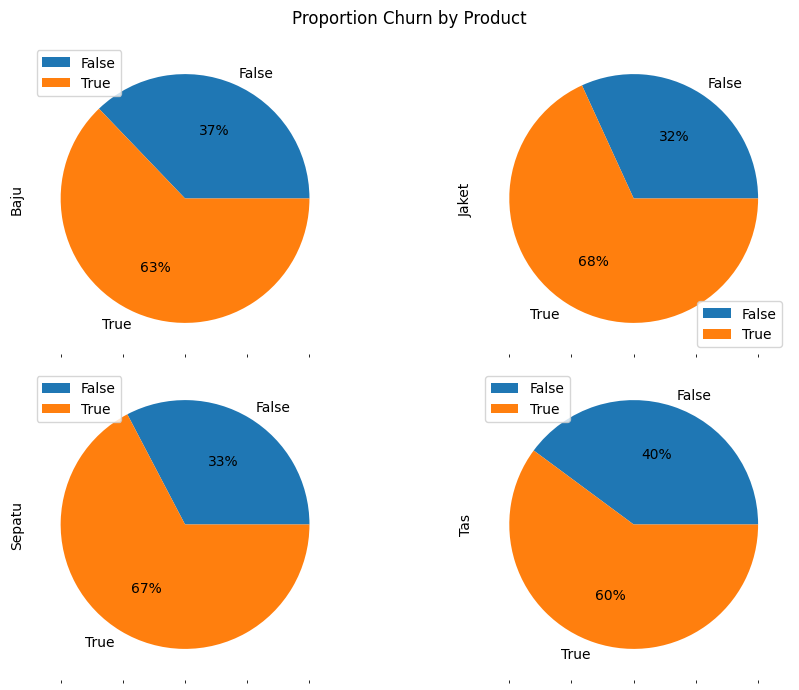

In [12]:
plt.clf()
# Melakukan pivot data dengan pivot_table
df_piv = df.pivot_table(index='is_churn',
                        columns='Product',
                        values='Customer_ID',
                        aggfunc='count',
                        fill_value=0)
# Mendapatkan Proportion Churn by Product
plot_product = df_piv.count().sort_values(ascending=False).head(5).index
# Plot pie chartnya
df_piv = df_piv.reindex(columns=plot_product)
df_piv.plot.pie(subplots=True,
                figsize=(10, 7),
                layout=(-1, 2),
                autopct='%1.0f%%',
                title='Proportion Churn by Product')
plt.tight_layout()
plt.show()

#### Distribusi kategorisasi count transaction

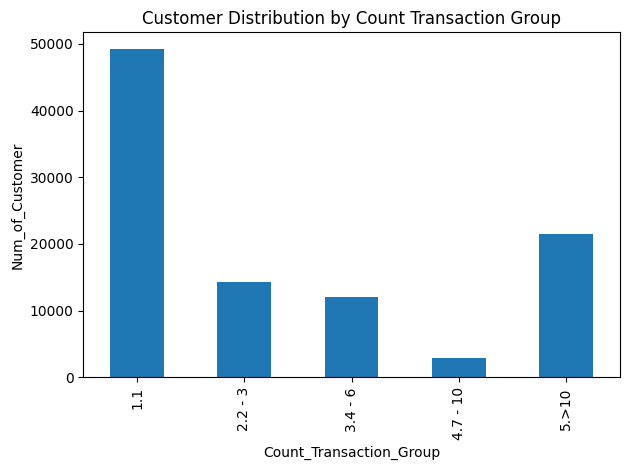

In [13]:
plt.clf()
# Kategorisasi jumlah transaksi
def func(row):
    if row['Count_Transaction'] == 1:
        val = '1.1'
    elif (row['Count_Transaction'] > 1 and row['Count_Transaction'] <= 3):
        val ='2.2 - 3'
    elif (row['Count_Transaction'] > 3 and row['Count_Transaction'] <= 6):
        val ='3.4 - 6'
    elif (row['Count_Transaction'] > 6 and row['Count_Transaction'] <= 10):
        val ='4.7 - 10'
    else:
        val ='5.>10'
    return val
# Tambahkan kolom baru
df['Count_Transaction_Group'] = df.apply(func, axis=1)

df_year = df.groupby(['Count_Transaction_Group'])['Customer_ID'].count()
df_year.plot(x='Count_Transaction_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Count Transaction Group')
plt.xlabel('Count_Transaction_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

#### Distribusi kategorisasi average transaction amount

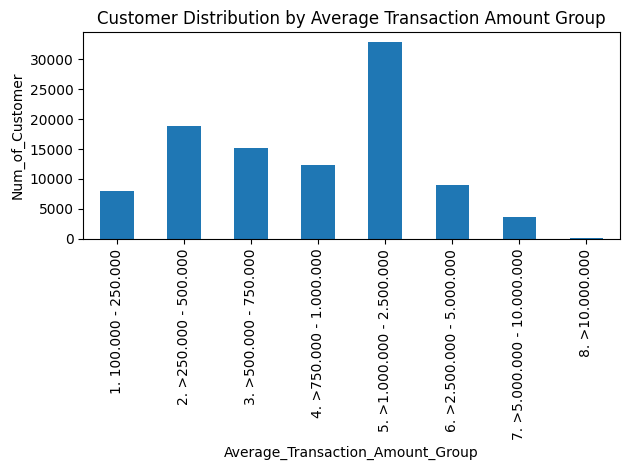

In [14]:
plt.clf()
# Kategorisasi rata-rata besar transaksi
def f(row):
    if (row['Average_Transaction_Amount'] >= 100000 and row['Average_Transaction_Amount'] <= 250000):
        val = '1. 100.000 - 250.000'
    elif (row['Average_Transaction_Amount'] > 250000 and row['Average_Transaction_Amount'] <= 500000):
        val = '2. >250.000 - 500.000'
    elif (row['Average_Transaction_Amount'] > 500000 and row['Average_Transaction_Amount'] <= 750000):
        val = '3. >500.000 - 750.000'
    elif (row['Average_Transaction_Amount'] > 750000 and row['Average_Transaction_Amount'] <= 1000000):
        val = '4. >750.000 - 1.000.000'
    elif (row['Average_Transaction_Amount'] > 1000000 and row['Average_Transaction_Amount'] <= 2500000):
        val = '5. >1.000.000 - 2.500.000'
    elif (row['Average_Transaction_Amount'] > 2500000 and row['Average_Transaction_Amount'] <= 5000000):
        val = '6. >2.500.000 - 5.000.000'
    elif (row['Average_Transaction_Amount'] > 5000000 and row['Average_Transaction_Amount'] <= 10000000):
        val = '7. >5.000.000 - 10.000.000'
    else:
        val = '8. >10.000.000'
    return val
# Tambahkan kolom baru
df['Average_Transaction_Amount_Group'] = df.apply(f, axis=1)

df_year = df.groupby(['Average_Transaction_Amount_Group'])['Customer_ID'].count()
df_year.plot(x='Average_Transaction_Amount_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Average Transaction Amount Group')
plt.xlabel('Average_Transaction_Amount_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

### Modelling

#### Feature Columns dan Target
Di bagian ini, selanjutnya akan menentukan feature columns dari dataset yang dimiliki, di sini dipilih kolom Average_Transaction_Amount, Count_Transaction, dan Year_Diff.

In [15]:
df['Year_Diff'] = df['Year_Last_Transaction'] - df['Year_First_Transaction']

# Nama-nama feature columns
feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

# Features variable
X = df[feature_columns]

# Target variable
y = df['is_churn']

In [24]:
df

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn,Year_First_Transaction,Year_Last_Transaction,Count_Transaction_Group,Average_Transaction_Amount_Group,Year_Diff
0,29531,Jaket,2016-06-19 02:44:34.395999908,2018-10-05 05:48:02.608000040,1467681,22,False,2016,2018,5.>10,5. >1.000.000 - 2.500.000,2
1,29531,Sepatu,2014-07-23 01:02:11.493999958,2018-12-25 11:02:41.269999981,1269337,41,False,2014,2018,5.>10,5. >1.000.000 - 2.500.000,4
2,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,False,2017,2019,5.>10,2. >250.000 - 500.000,2
3,141526,Jaket,2017-04-28 06:52:52.546999931,2019-01-16 13:00:03.911000013,722632,27,False,2017,2019,5.>10,3. >500.000 - 750.000,2
4,37545,Sepatu,2015-04-16 10:01:38.530999899,2018-11-22 12:53:41.529999970,1775036,25,False,2015,2018,5.>10,5. >1.000.000 - 2.500.000,3
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,56249,Jaket,2016-06-01 11:35:39.092000008,2016-06-01 11:35:39.092000008,298662,1,True,2016,2016,1.1,2. >250.000 - 500.000,0
99996,56249,Sepatu,2017-02-09 05:46:10.763000011,2017-02-09 05:46:10.763000011,349556,1,True,2017,2017,1.1,2. >250.000 - 500.000,0
99997,34157,Jaket,2015-08-30 08:54:20.706000090,2015-08-30 08:54:20.706000090,598013,1,True,2015,2015,1.1,3. >500.000 - 750.000,0
99998,34157,Sepatu,2014-11-14 02:42:28.026000023,2014-11-14 02:42:28.026000023,1208591,1,True,2014,2014,1.1,5. >1.000.000 - 2.500.000,0


#### Normalisasi Data

In [16]:
from sklearn.preprocessing import StandardScaler
# Inisiasi nama objek scaler
scaler = StandardScaler()
# Sesuaikan scaler dengan data
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,Average_Transaction_Amount,Count_Transaction,Year_Diff
0,0.061203,0.290862,1.25890
1,-0.067223,0.827325,3.01902
2,-0.687791,0.516741,1.25890
3,-0.421208,0.432036,1.25890
4,0.260212,0.375567,2.13896


#### Split X dan y ke dalam bagian training dan testing
X dan y dipecah ke dalam bagian training dan testing. Bagian testing 25% dari jumlah entri data.

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=0)

#### Train, predict dan evaluate
Model menggunakan Logistic Regression, dimulai dengan pembuatan model, fitting, dan kemudian evaluasi model dengan menggunakan confusion matrix.

In [18]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
# Convert y_train and y_test to integer type (0 or 1) before encoding
y_train = lb.fit_transform(y_train.astype(int))
y_test = lb.transform(y_test.astype(int))

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Inisiasi model logreg
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)

# Predict model
y_pred = logreg.predict(X_test)

# Evaluasi model menggunakan confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[ 3431  4900]
 [  999 15670]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Visualisasi Confusion Matrix
1. True Negative (TN): Model memprediksi tidak churn dan memang benar tidak churn.
2. False Positive (FP): Model memprediksi churn, padahal sebenarnya tidak churn.
3. False Negative (FN): Model memprediksi tidak churn, padahal sebenarnya churn.
4. True Positive (TP): Model memprediksi churn dan memang benar churn.

<Figure size 640x480 with 0 Axes>

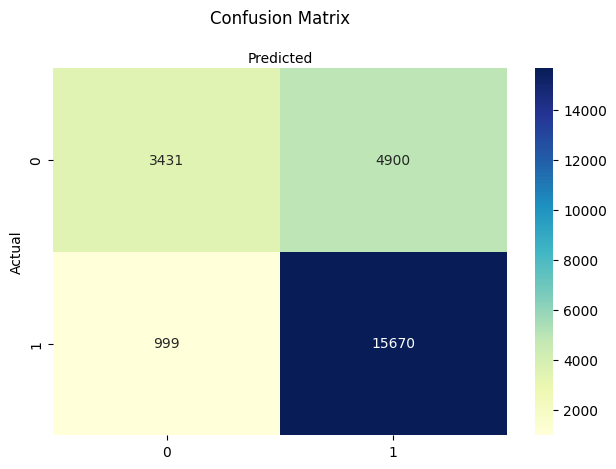

In [20]:
plt.clf()
# name  of classes
class_names = [0, 1]
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

#### Accuracy, Precision, dan Recall

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report

#Menghitung Accuracy, Precision, dan Recall
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)
print('Accuracy Score: ', accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.41      0.54      8331
           1       0.76      0.94      0.84     16669

    accuracy                           0.76     25000
   macro avg       0.77      0.68      0.69     25000
weighted avg       0.77      0.76      0.74     25000

Accuracy Score:  0.76404


#### Feature Importance

In [23]:
# Coefficients and Odds Ratios
coefficients = logreg.coef_[0]
odds_ratios = np.exp(coefficients)


# Display feature importance using coefficients and odds ratios
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios
})
print("\nFeature Importance (Coefficient and Odds Ratio):")
print(feature_importance.sort_values(by='Coefficient', ascending=False))


Feature Importance (Coefficient and Odds Ratio):
                      Feature  Coefficient  Odds Ratio
0  Average_Transaction_Amount    -0.005204    0.994810
2                   Year_Diff    -0.590390    0.554111
1           Count_Transaction    -0.907926    0.403360


#### Making a Predictive System

In [26]:
input_data = (1467681,22,2)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = logreg.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('This Customer will not churn')
else:
  print('This Customer will churn')

[0]
This Customer is not churn


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Saving the Trained Model

In [28]:
import pickle
filename = 'customer_curn.sav'
pickle.dump(logreg, open(filename, 'wb'))

In [30]:
# loading the saved model
loaded_model = pickle.load(open('customer_curn.sav', 'rb'))

In [31]:
input_data = (1467681,22,2)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('This customer will not churn')
else:
  print('This customer will churn')

[0]
This Customer is not churn


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [32]:
for column in X.columns:
  print(column)

Average_Transaction_Amount
Count_Transaction
Year_Diff


### Conclusion

Let's break down the classification report to understand your model's performance:

Precision: This tells you how many of the predicted positive cases were actually positive. For '0.0' (not churned), a precision of 0.78 means that when the model predicted a customer would not churn, it was correct 78% of the time. For '1.0' (churned), a precision of 0.76 means that when the model predicted a customer would churn, it was correct 76% of the time.

Recall: This tells you how many of the actual positive cases were correctly identified. For '0.0' (not churned), a recall of 0.41 means that the model only correctly identified 41% of the actual non-churning customers. For '1.0' (churned), a recall of 0.94 means the model successfully identified 94% of the actual churned customers.

F1-score: This is the harmonic mean of precision and recall, providing a balance between the two. A higher F1-score indicates a better balance. For '0.0', it's 0.54, and for '1.0', it's 0.84.

Support: This is the number of actual occurrences of each class in the test set. There were 8331 non-churned customers and 16669 churned customers.

Accuracy: The overall accuracy of the model is 0.76 (76%), meaning it correctly predicted the outcome for 76% of all instances in the test set.

Macro Avg: This calculates the average of the metrics for each class, giving equal weight to each class. For example, macro avg precision is (0.78 + 0.76) / 2 = 0.77. It's useful when you want to treat all classes equally, regardless of their size.

Weighted Avg: This calculates the average of the metrics for each class, weighted by their support (the number of samples in each class). For example, weighted avg precision considers the larger '1.0' class more heavily. It's useful when you have imbalanced classes.

Interpretation:

Your model is much better at identifying customers who will churn (class 1.0) with a very high recall of 94%. This means it misses very few of the actual churners. However, its recall for customers who will not churn (class 0.0) is quite low at 41%, meaning it incorrectly predicts many non-churners as churners. This is also reflected in the relatively low precision for class 1.0 compared to its high recall. The model has a tendency to lean towards predicting 'churn' to avoid missing actual churners. Whether this is good or bad depends on the specific business problem and the costs associated with false positives vs. false negatives.